In [1]:
# Parameters
working_dir = "/nfs/team205/heart/Vitro/TF_selection"
path_to_adata_dir = "/nfs/team205/heart/anndata_objects/Vitro/post_multiVI_full-features"
path_to_adata_peak_tfidf = "/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/PeakMatrix/Foetal_Peaks_tfidf.h5ad"
group_key = "t_binned"
group_a = "t3"
group_b = "t1"
time_key = "t"
subset_object = False
geneset_list = ["MSigDB_Hallmark_2020", "KEGG_2021_Human", "GO_Biological_Process_2023"]

path_to_eRegulon_signatures_gene = "/nfs/team205/heart/pyscenic/plus/eRegulon_signatures/vCM_onlyLeft_Gene_eRegulon_signatures.pkl"
path_to_eRegulon_signatures_region = "/nfs/team205/heart/pyscenic/plus/eRegulon_signatures/vCM_onlyLeft_Region_eRegulon_signatures.pkl"

path_to_DAR_compact = '/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/MarkerPeaks/vCM_Left_Compact-vs-Trab.csv'
path_to_DAR_trab = '/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/MarkerPeaks/vCM_Left_Trab-vs-Compact.csv'
path_to_eRegulon_metadata = "/nfs/team205/heart/pyscenic/plus/eRegulon_metadata/vCM_onlyLeft_eRegulon_metadata_filtered.csv" # filtered metadata

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import session_info
session_info.show()

In [4]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [5]:
sc.settings.set_figure_params(dpi=120)

# Function

# Read in adata

In [6]:
# read in normalised data
adata_tfidf = sc.read_h5ad(path_to_adata_peak_tfidf)
print(adata_tfidf.X.data[:10])
adata_tfidf

[1.768611  1.9229858 3.635446  1.3192275 1.4049321 1.8123279 1.6739427
 2.9703567 3.3852873 1.2617257]


AnnData object with n_obs × n_vars = 167022 × 508040
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

In [7]:
# read in compact, trabeculated, all adata
# which has pseudotime, etc

print('### compact ###')
adata_compact = sc.read_h5ad(f'{path_to_adata_dir}/Foetal_vCM_Left-compact_atac.h5ad')
# filter features to remove those that appear in fewer than 0.5% of the cells
print(adata_compact.shape)
sc.pp.filter_genes(adata_compact, min_cells=int(adata_compact.shape[0] * 0.005))
print(adata_compact.shape)
# replace .X data with tf-idf normalised data
adata_compact.X = adata_tfidf[adata_compact.obs_names,adata_compact.var_names].X
print(adata_compact.X.data[:10])
print(adata_compact)

print('### trabeculated ###')
adata_trab = sc.read_h5ad(f'{path_to_adata_dir}/Foetal_vCM_Left-trabeculated_atac.h5ad')
# filter features to remove those that appear in fewer than 0.5% of the cells
print(adata_trab.shape)
sc.pp.filter_genes(adata_trab, min_cells=int(adata_trab.shape[0] * 0.005))
print(adata_trab.shape)
# replace .X data with tf-idf normalised data
adata_trab.X = adata_tfidf[adata_trab.obs_names,adata_trab.var_names].X
print(adata_trab.X.data[:10])
print(adata_trab)

'''
print('### all ###')
adata_all = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/vCM/post_scFate/foetal_vCM_onlyLeft.h5ad')
# subset peak feature data
adata_all = adata_all[:,adata_all.var['modality']=='Peaks']
# select features
# features = list(set(list(adata_compact.var_names)+list(adata_trab.var_names)))
# adata_all = adata_all[:,features]
# replace .X data with tf-idf normalised data
adata_all.X = adata_tfidf[adata_all.obs_names,adata_all.var_names].X
print(adata_all.X.data[:10])
print(adata_all)
'''

### compact ###
(11397, 508040)
(11397, 242879)
[1.885513  4.3636436 1.0840797 2.524973  1.4176022 2.0811439 2.3172326
 2.7016861 0.8455251 4.038132 ]
AnnData object with n_obs × n_vars = 11397 × 242879
    obs: 'sangerID', 'combinedID', 'donor', 'region', 'age', 'sex', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'week', 'trimester', 'cycling', 'S_score', 'G2M_score', 'phase', 'fine_grain', 'mid_grain', 'coarse_grain', 'batch_key', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', '_indices', '_scvi_batch', '_scvi_labels', 'leiden_MultiVI', 't', 'seg', 'edge', 'milestones', 'age_days', 'week_cont', 't_binned'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 

"\nprint('### all ###')\nadata_all = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/vCM/post_scFate/foetal_vCM_onlyLeft.h5ad')\n#\xa0subset peak feature data\nadata_all = adata_all[:,adata_all.var['modality']=='Peaks']\n#\xa0select features\n#\xa0features = list(set(list(adata_compact.var_names)+list(adata_trab.var_names)))\n#\xa0adata_all = adata_all[:,features]\n#\xa0replace .X data with tf-idf normalised data\nadata_all.X = adata_tfidf[adata_all.obs_names,adata_all.var_names].X\nprint(adata_all.X.data[:10])\nprint(adata_all)\n"

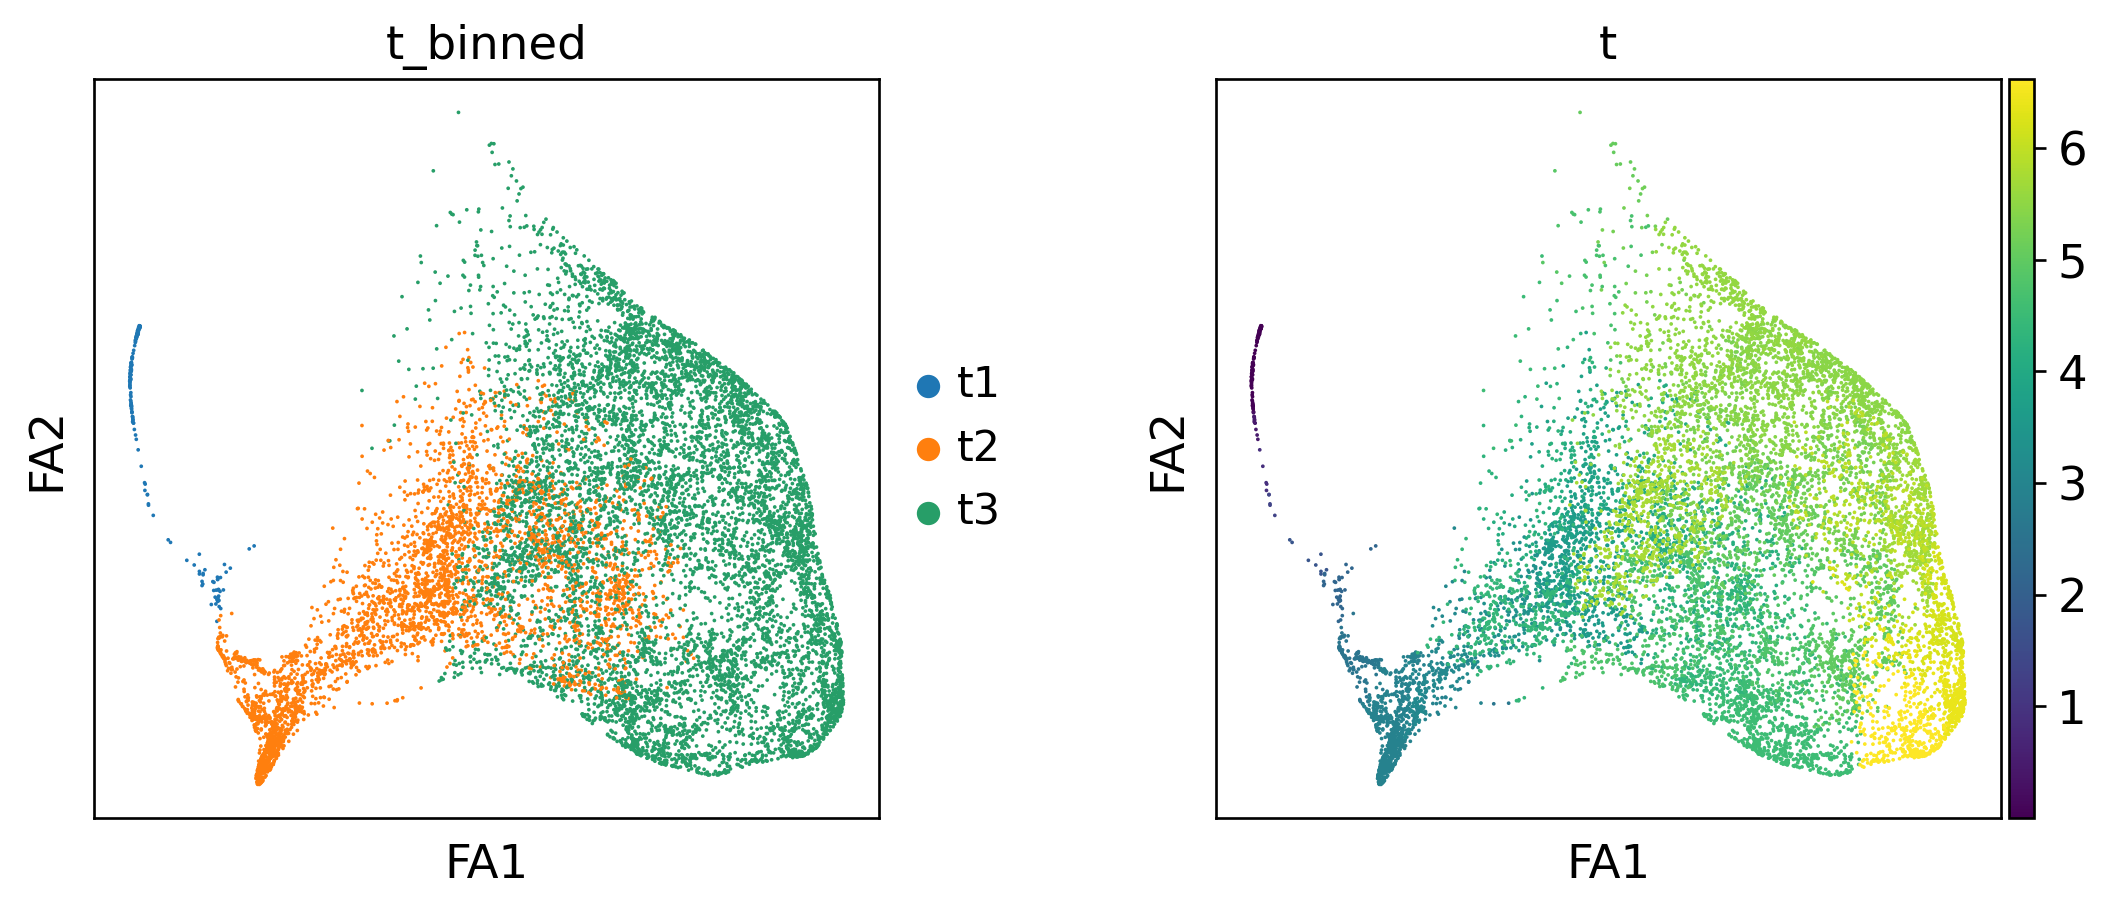

In [8]:
sc.pl.draw_graph(adata_compact, color=[group_key, time_key], size=5, wspace=0.3, ncols=3)

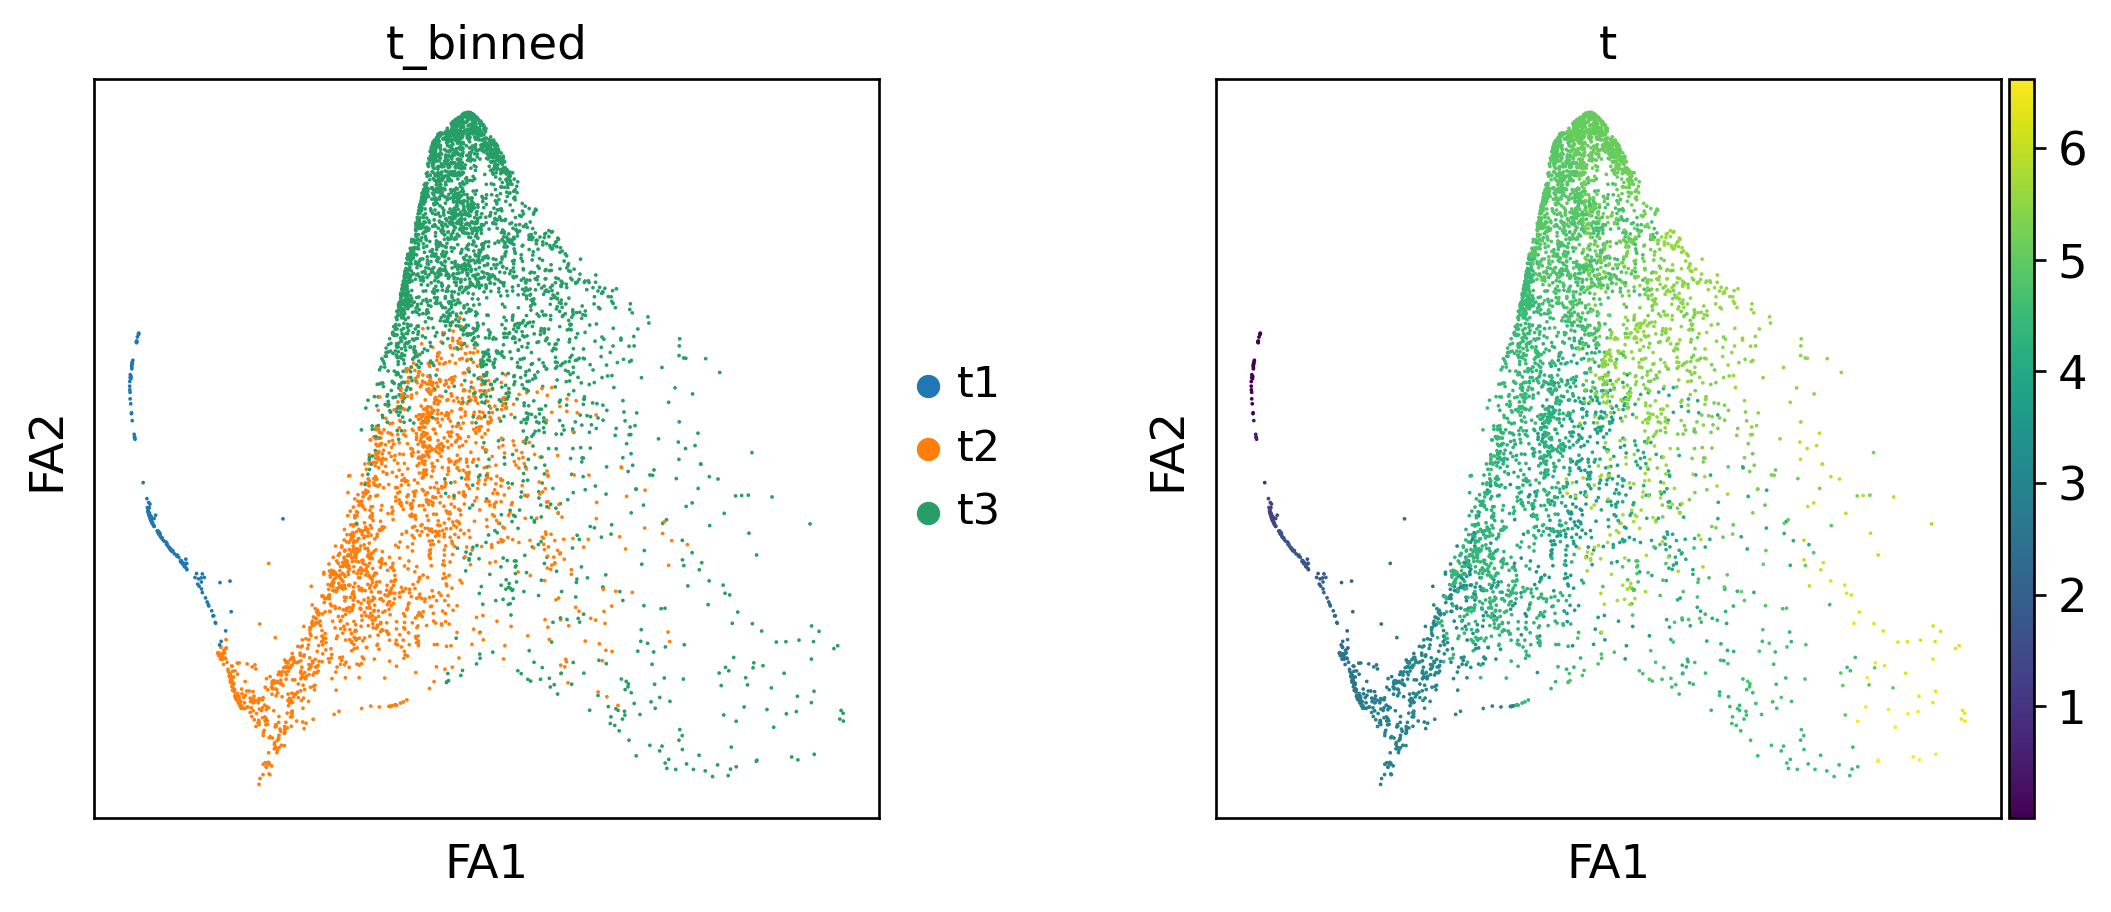

In [9]:
sc.pl.draw_graph(adata_trab, color=[group_key, time_key], size=5, wspace=0.3, ncols=3)

# ~Read in DAR result: compact-vs-trab~

In [ ]:
'''
logFC_threshold = 0.1
FDR_threshold = 1

# compact
compact_dar = pd.read_csv(path_to_DAR_compact)
compact_dar_up = compact_dar[(compact_dar['Log2FC']> logFC_threshold)&(compact_dar['FDR']<FDR_threshold)]
compact_dar_down = compact_dar[(compact_dar['Log2FC']< -logFC_threshold)&(compact_dar['FDR']<FDR_threshold)]
print(f'compact, up: {len(compact_dar_up)} regions')
print(f'compact, down: {len(compact_dar_down)} regions')
'''

# Read in fitted result, gene

In [12]:
fit_res_compact = pd.read_csv(f'{working_dir}/foetal_vCM_left-compact/outs/Fitting_{time_key}_Peak.csv',index_col=0)
fit_res_trab = pd.read_csv(f'{working_dir}/foetal_vCM_left-trabeculated/outs/Fitting_{time_key}_Peak.csv',index_col=0)

In [13]:
fit_res_compact.head()

p_val         A           fdr  st  signi  \
Peaks                                                                       
chr1:240234383_240234883  3.651311e-26  4.771712  8.868267e-21   1   True   
chr9:93673338_93673838    2.756415e-08  3.601689  6.694754e-03   0  False   
chr22:42772683_42773183   7.050239e-12  3.460671  1.712355e-06   1   True   
chr4:140990539_140991039  3.187461e-22  3.446619  7.741672e-17   1   True   
chr1:41430927_41431427    7.502866e-30  3.395091  1.822289e-24   1   True   

                          activator_repressor  
Peaks                                          
chr1:240234383_240234883            240234883  
chr9:93673338_93673838               93673838  
chr22:42772683_42773183              42773183  
chr4:140990539_140991039            140991039  
chr1:41430927_41431427               41431427

In [ ]:
fit_res_compact.loc['CDKN1A']

# Select fitted genes which were highest in the group_a or group_b

**i.e. separating into UP or DOWN regulated genes**

In [22]:
# compact
group_mean_compact = utils.grouped_obs_mean(adata_compact,group_key=group_key)

# select upregulated (a>b) or downregulated (b>a) genes
group_a_peaks_compact = list(group_mean_compact.index[group_mean_compact[group_a] > group_mean_compact[group_b]])
group_b_peaks_compact = list(group_mean_compact.index[group_mean_compact[group_b] > group_mean_compact[group_a]])

group_mean_compact.head()

t1        t2        t3
chr1:826566_827066  0.069700  0.039726  0.050032
chr1:827291_827791  0.229363  0.194875  0.238619
chr1:828703_829203  0.042672  0.063667  0.040955
chr1:830674_831174  0.000000  0.048451  0.037710
chr1:831213_831713  0.053838  0.147282  0.170071

In [23]:
# trabeculated
group_mean_trab = utils.grouped_obs_mean(adata_trab,group_key=group_key)

# select upregulated (a>b) or downregulated (b>a) genes
group_a_peaks_trab = list(group_mean_trab.index[group_mean_trab[group_a] > group_mean_trab[group_b]])
group_b_peaks_trab = list(group_mean_trab.index[group_mean_trab[group_b] > group_mean_trab[group_a]])

group_mean_trab.head()

t1        t2        t3
chr1:826566_827066  0.023032  0.068877  0.045200
chr1:827291_827791  0.213915  0.182125  0.224851
chr1:828703_829203  0.000000  0.054847  0.049131
chr1:830674_831174  0.030773  0.067277  0.048054
chr1:831213_831713  0.097459  0.193500  0.197446

# Fitted peaks

In [24]:
fit_fdr_threshold = 0.05
fit_A_threshold = 0.5

In [25]:
# compact
fit_res_sel_compact = fit_res_compact[(fit_res_compact['fdr']<fit_fdr_threshold)&\
                                      (fit_res_compact['A']>fit_A_threshold)
                                     ]
# group a, upregulated
shared = list(set(fit_res_sel_compact.index).intersection(group_a_peaks_compact))
fit_res_sel_up2a_compact = fit_res_sel_compact.loc[shared]
fit_res_sel_up2a_compact = fit_res_sel_up2a_compact.sort_values('A',ascending=False)
print(f'up towards {group_a}, number of fitted peaks: {len(fit_res_sel_up2a_compact)}')
# group b, downregulated
shared = list(set(fit_res_sel_compact.index).intersection(group_b_peaks_compact))
fit_res_sel_up2b_compact = fit_res_sel_compact.loc[shared]
fit_res_sel_up2b_compact = fit_res_sel_up2b_compact.sort_values('A',ascending=False)
print(f'up towards {group_b}, number of fitted peaks: {len(fit_res_sel_up2b_compact)}')

up towards t3, number of fitted peaks: 4483
up towards t1, number of fitted peaks: 14499


In [26]:
# trabeculated
fit_res_sel_trab = fit_res_trab[(fit_res_trab['fdr']<fit_fdr_threshold)&\
                                (fit_res_trab['A']>fit_A_threshold)
                                     ]
# group a, upregulated
shared = list(set(fit_res_sel_trab.index).intersection(group_a_peaks_trab))
fit_res_sel_up2a_trab = fit_res_sel_trab.loc[shared]
fit_res_sel_up2a_trab = fit_res_sel_up2a_trab.sort_values('A',ascending=False)
print(f'up towards {group_a}, number of fitted peaks: {len(fit_res_sel_up2a_trab)}')
# group b, downregulated
shared = list(set(fit_res_sel_trab.index).intersection(group_b_peaks_trab))
fit_res_sel_up2b_trab = fit_res_sel_trab.loc[shared]
fit_res_sel_up2b_trab = fit_res_sel_up2b_trab.sort_values('A',ascending=False)
print(f'up towards {group_b}, number of fitted peaks: {len(fit_res_sel_up2b_trab)}')

up towards t3, number of fitted peaks: 4147
up towards t1, number of fitted peaks: 21577


<AxesSubplot:xlabel='fdr', ylabel='A'>

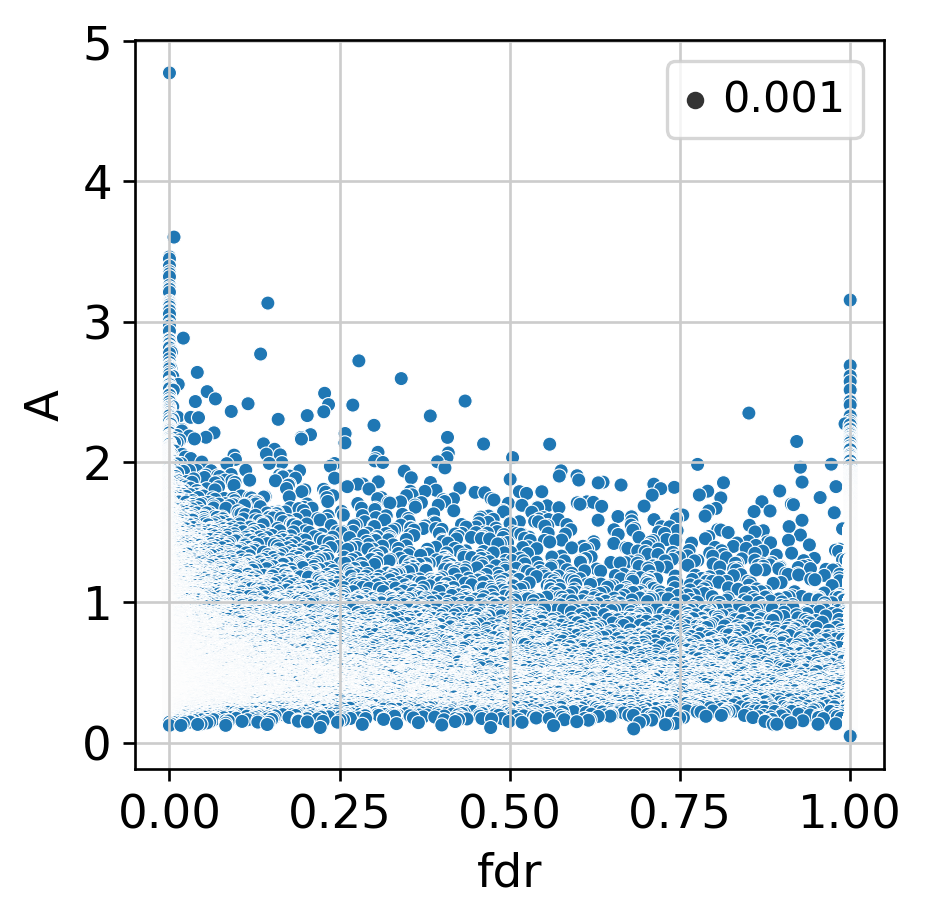

In [38]:
sns.scatterplot(fit_res_compact,
                x='fdr',
                y='A',
                size=0.001
                )

<AxesSubplot:xlabel='fdr', ylabel='A'>

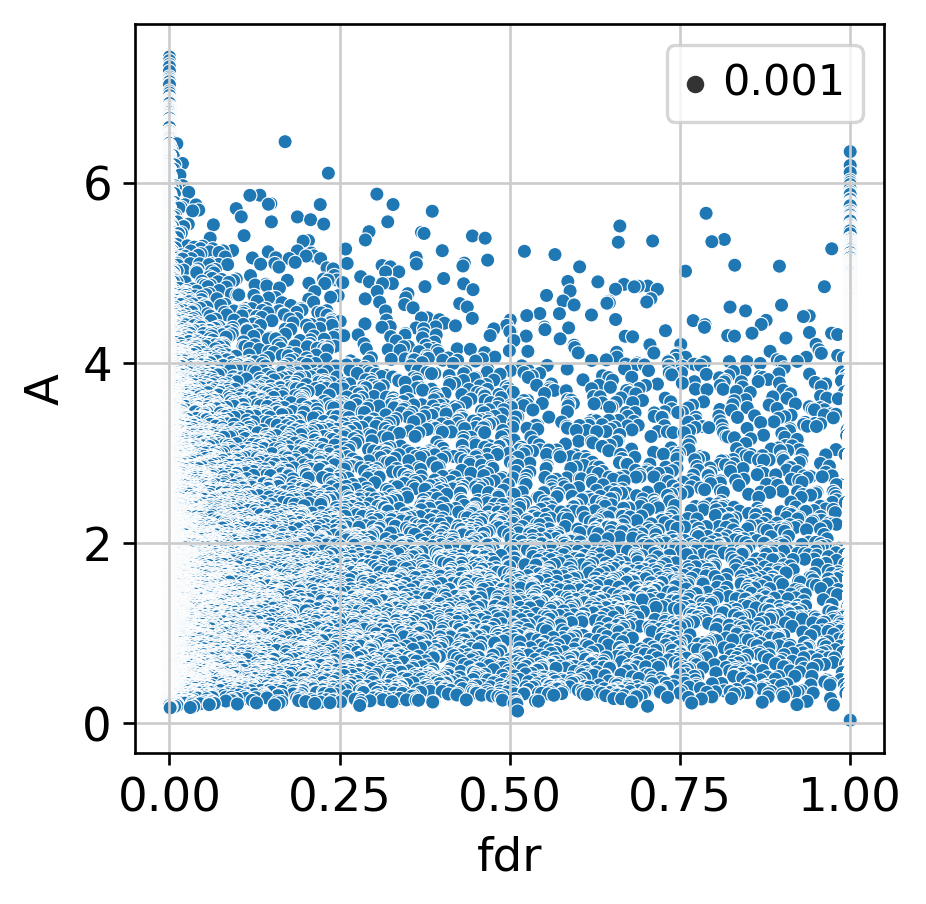

In [39]:
sns.scatterplot(fit_res_trab,
                x='fdr',
                y='A',
                size=0.001
                )

In [33]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

# Save the peaks

In [40]:
peak_signatures = {}
# up, towards group_a
peak_signatures['compact_up'] = list(fit_res_sel_up2a_compact.index)
peak_signatures['trab_up'] = list(fit_res_sel_up2a_trab.index)

# down, towards group_b
peak_signatures['compact_down'] = list(fit_res_sel_up2b_compact.index)
peak_signatures['trab_down'] = list(fit_res_sel_up2b_trab.index)

print(peak_signatures.keys())

# save
utils.save_pkl(peak_signatures,
           file = f'{working_dir}/foetal_vCM_left_compact-vs-trabeculated_downstream/peak_signatures.pkl'
          )

dict_keys(['compact_up', 'trab_up', 'compact_down', 'trab_down'])


In [41]:
f'{working_dir}/foetal_vCM_left_compact-vs-trabeculated_downstream/peak_signatures.pkl'

'/nfs/team205/heart/Vitro/TF_selection/foetal_vCM_left_compact-vs-trabeculated_downstream/peak_signatures.pkl'

# Scoring and plot

In [42]:
adata_compact.X.data[:10]

array([1.885513 , 4.3636436, 1.0840797, 2.524973 , 1.4176022, 2.0811439,
       2.3172326, 2.7016861, 0.8455251, 4.038132 ], dtype=float32)

In [43]:
fit_res_sel_up2a_compact

p_val         A           fdr  st  signi  \
Peaks                                                                       
chr1:240234383_240234883  3.651311e-26  4.771712  8.868267e-21   1   True   
chr9:93673338_93673838    2.756415e-08  3.601689  6.694754e-03   0  False   
chr22:42772683_42773183   7.050239e-12  3.460671  1.712355e-06   1   True   
chr12:48124648_48125148   2.019786e-17  3.239946  4.905636e-12   1   True   
chr12:46438700_46439200   5.175880e-30  3.230417  1.257113e-24   1   True   
...                                ...       ...           ...  ..    ...   
chr17:44844769_44845269   7.937693e-08  0.500320  1.927899e-02   0  False   
chr14:32203313_32203813   5.117843e-13  0.500279  1.243017e-07   0  False   
chr17:19387459_19387959   1.354058e-22  0.500213  3.288722e-17   0  False   
chr22:32801332_32801832   9.383473e-08  0.500177  2.279049e-02   0  False   
chr16:87381234_87381734   8.252550e-09  0.500092  2.004371e-03   0  False   

                          activator_repressor  
Peaks                                          
chr1:240234383_240234883            240234883  
chr9:93673338_93673838               93673838  
chr22:42772683_42773183              42773183  
chr12:48124648_48125148              48125148  
chr12:46438700_46439200              46439200  
...                                       ...  
chr17:44844769_44845269              44845269  
chr14:32203313_32203813              32203813  
chr17:19387459_19387959              19387959  
chr22:32801332_32801832              32801832  
chr16:87381234_87381734              87381734  

[4483 rows x 6 columns]

/home/jovyan/my-conda-envs/vitro/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/jovyan/my-conda-envs/vitro/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


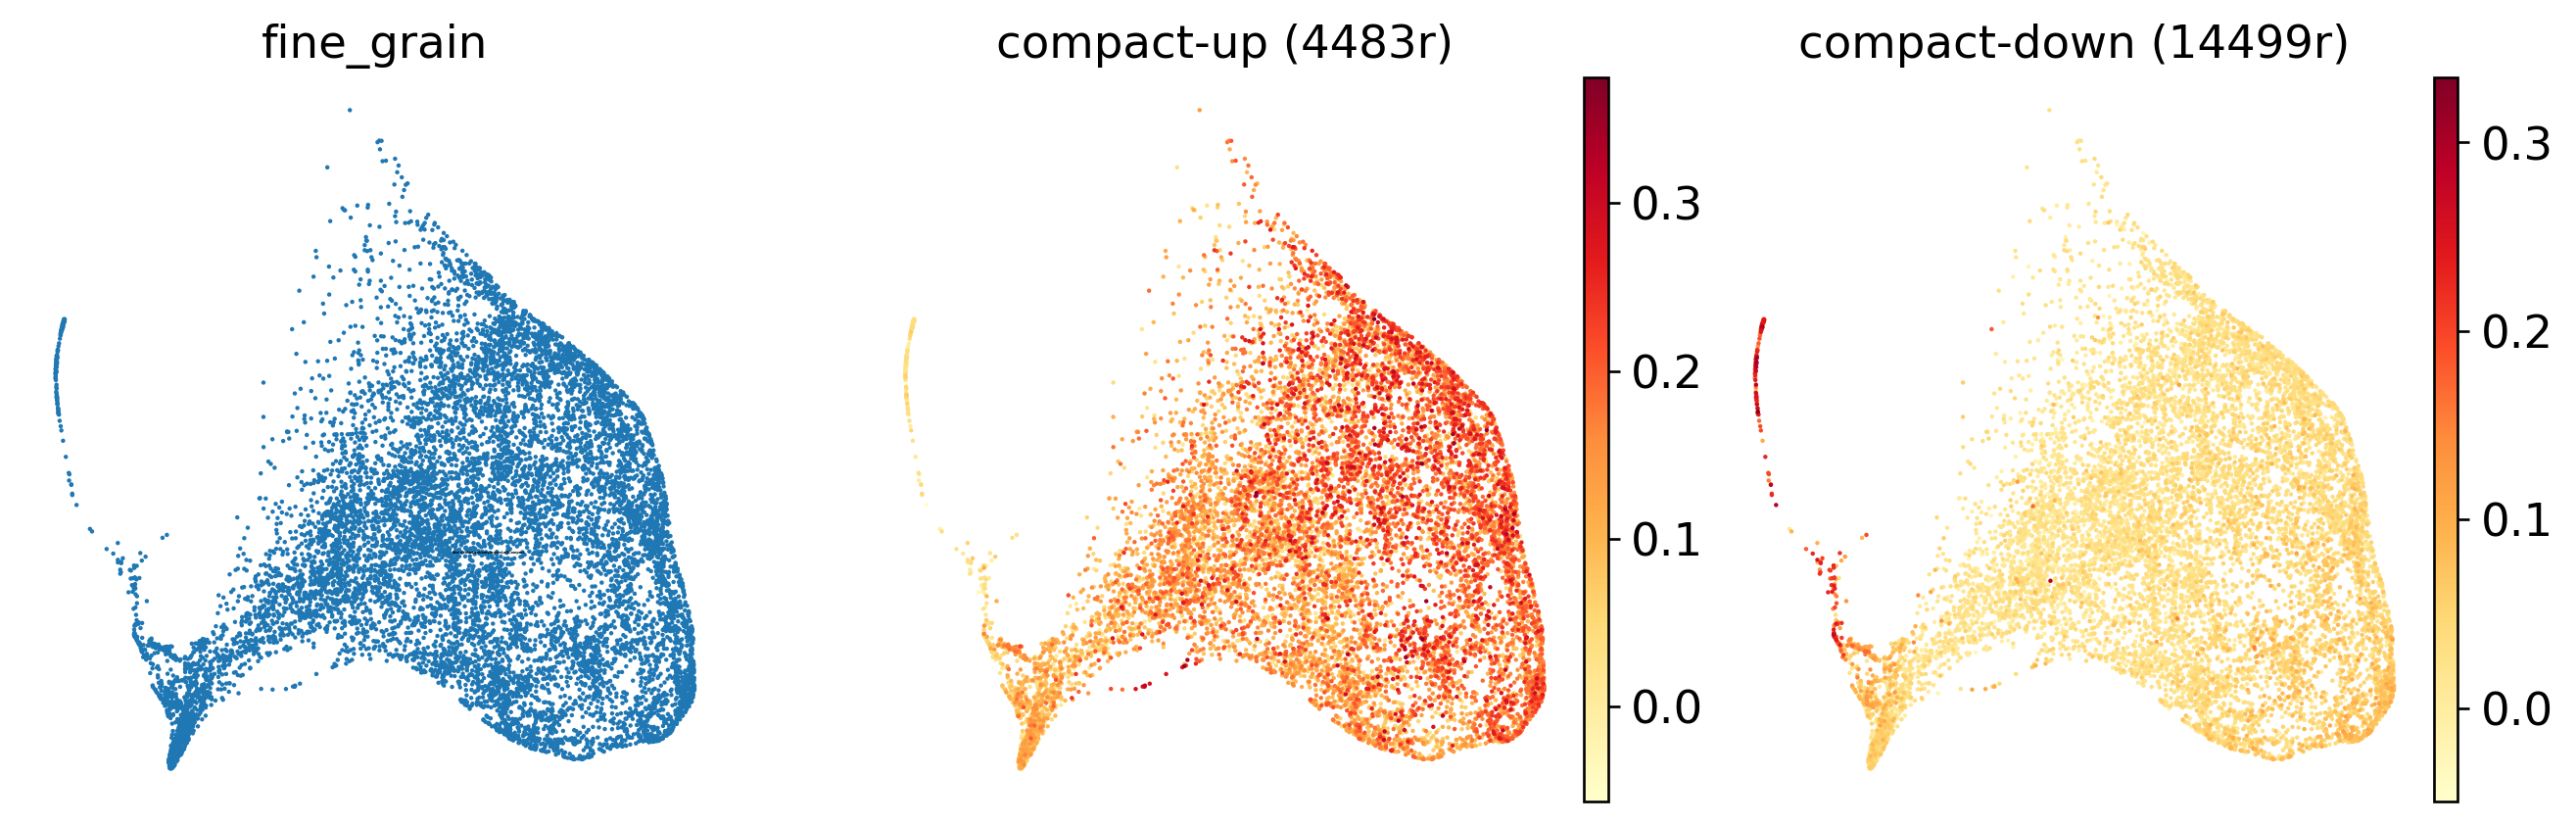

In [45]:
# compact
sc.tl.score_genes(adata_compact,peak_signatures['compact_up'],score_name=f'compact-up ({len(peak_signatures["compact_up"])}r)')
sc.tl.score_genes(adata_compact,peak_signatures['compact_down'],score_name=f'compact-down ({len(peak_signatures["compact_down"])}r)')

sc.pl.draw_graph(adata_compact, color=['fine_grain',
                                   f'compact-up ({len(peak_signatures["compact_up"])}r)',
                                   f'compact-down ({len(peak_signatures["compact_down"])}r)',
                                  ], 
                 frameon=False, legend_loc='on data',legend_fontsize=0,
                 size=7, wspace=0.1, ncols=4, cmap='YlOrRd')

/home/jovyan/my-conda-envs/vitro/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/jovyan/my-conda-envs/vitro/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


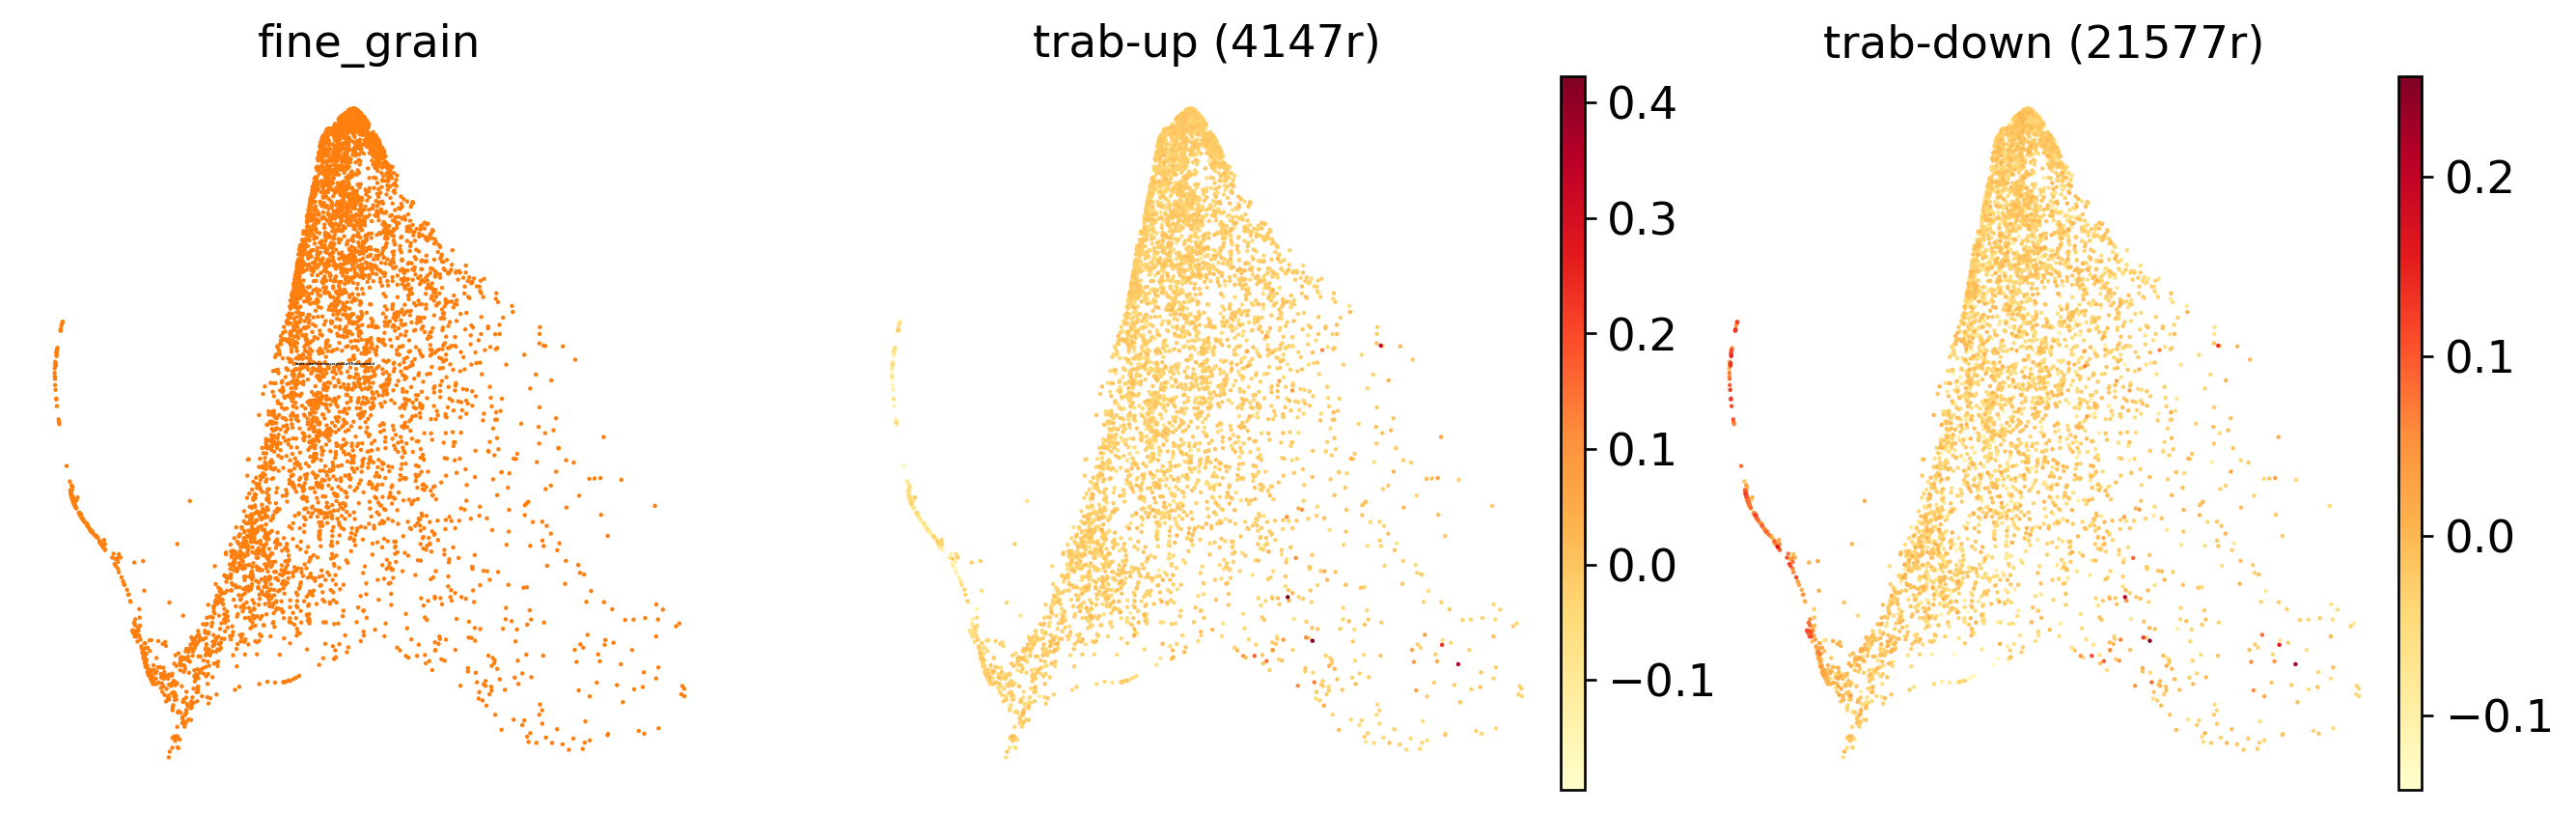

In [47]:
# trabeculated
sc.tl.score_genes(adata_trab,peak_signatures['trab_up'],score_name=f'trab-up ({len(peak_signatures["trab_up"])}r)')
sc.tl.score_genes(adata_trab,peak_signatures['trab_down'],score_name=f'trab-down ({len(peak_signatures["trab_down"])}r)')

sc.pl.draw_graph(adata_trab, color=['fine_grain',
                                   f'trab-up ({len(peak_signatures["trab_up"])}r)',
                                   f'trab-down ({len(peak_signatures["trab_down"])}r)',
                                  ], 
                 frameon=False, legend_loc='on data',legend_fontsize=0,
                 size=7, wspace=0.1, ncols=4, cmap='YlOrRd')